In [3]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
plt.rcParams['figure.dpi'] = 600 

yes
yes
yes
yes
yes
yes
yes


KeyboardInterrupt: 

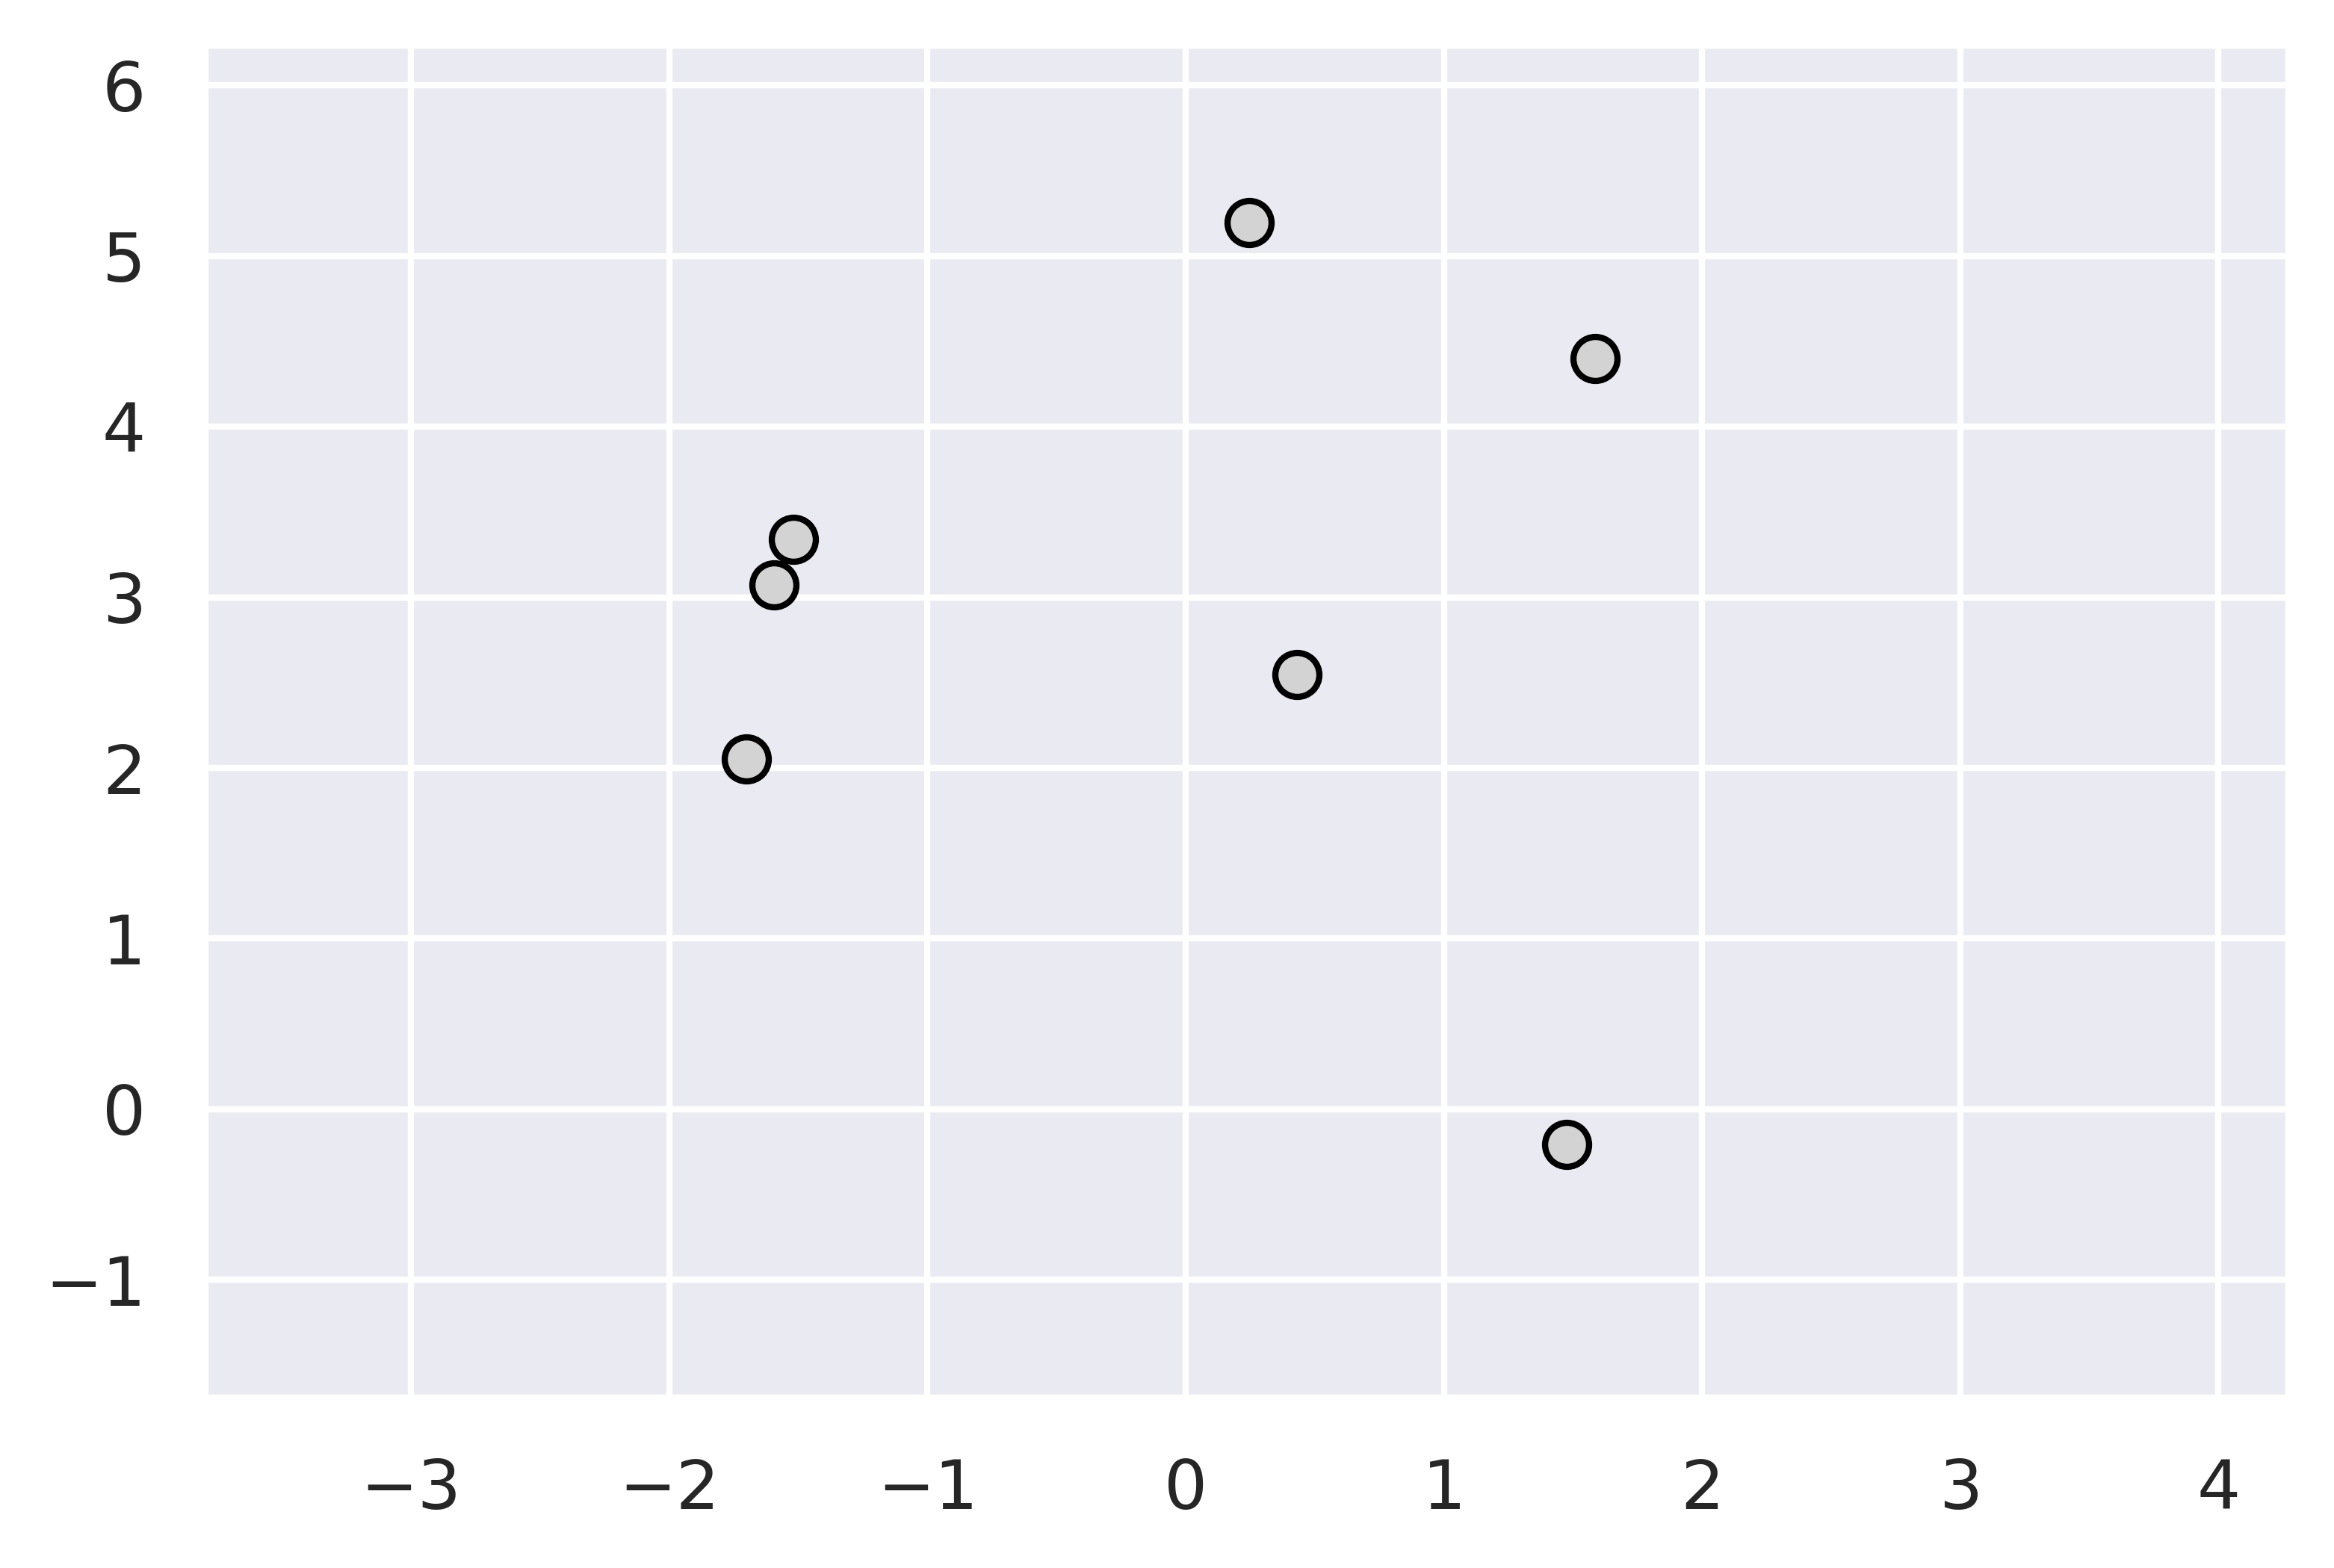

In [4]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

# create dataset
X, y = make_blobs(
   n_samples=300, n_features=2,
   centers=3, cluster_std=0.8,
   shuffle=True, random_state=0
)

# plot
#plt.scatter(
 #  X[:, 0], X[:, 1], s=50 , c= "lightgray", edgecolor='black')

plt.show()
up, down, left, right= (-1.6948280550867445, 6.238825153517183 ,-3.798478889076721 ,4.274306231253566)
for i in range(0,len(y)+1):
    plt.cla()
    plt.xlim(left, right)
    plt.ylim(up, down);
    plt.scatter(
       X[0:i, 0], X[0:i, 1], s=50 , c= "lightgray", edgecolor='black')
    name=  f"img_x/A{i:03}.jpg"
    plt.savefig(name)
    print("yes")


In [5]:
init=np.array([[-3,5.5],[-3,5.3],[-3,5.1]])

In [26]:
center_dict= {}


In [38]:
from ipywidgets import *
def func(iteration_step,clusters=3):
    if iteration_step == 0:
        plt.scatter(
       X[:, 0], X[:, 1], s=50 , c= "lightgray", edgecolor='black')
        plt.scatter(init[:, 0],init[:, 1], 
            s=250, marker='*', label='centroids',
            edgecolor='black',
           c=np.arange(0,clusters),cmap=plt.cm.Paired,)
        name=  f"img_sk/B{iteration_step:03}"
        plt.savefig(name)
        print("yes")
        center_dict[f"it{iteration_step}"]=init
    else:
        km = KMeans(
        n_clusters=clusters, init=init,
        n_init=1, max_iter=iteration_step, 
        tol=1e-04, random_state=0
        ) #(n_clusters, n_features)
        global y_km
        y_km = km.fit_predict(X)
        plt.scatter(X[:,0], X[:,1], c=y_km, cmap=plt.cm.Paired, alpha=0.4)
        center_dict[f"it{iteration_step}"]= km.cluster_centers_
        plt.scatter(km.cluster_centers_[:, 0],km.cluster_centers_[:, 1], 
                s=250, marker='*', label='centroids',
                edgecolor='black',
               c=np.arange(0,clusters),cmap=plt.cm.Paired,)
        name=  f"img_sk/B{iteration_step:03}"
        plt.savefig(name)
        print("yes")

    
interact(func,iteration_step=IntSlider(1,min=0, max=23, step=1,continuous_update=False),
        clusters=3) 


interactive(children=(IntSlider(value=1, continuous_update=False, description='iteration_step', max=23), IntSl…

<function __main__.func(iteration_step, clusters=3)>

In [40]:
center_dict.keys()

dict_keys(['it1', 'it2', 'it3', 'it4', 'it5', 'it6', 'it7', 'it8', 'it9', 'it10', 'it11', 'it12', 'it13', 'it14', 'it15', 'it0'])

In [46]:
#saver
def func(iteration_step,save_num,old,clusters=3):
    if iteration_step == 0:
        plt.scatter(
       X[:, 0], X[:, 1], s=50 , c= "lightgray", edgecolor='black')
        plt.scatter(init[:, 0],init[:, 1], 
            s=250, marker='*', label='centroids',
            edgecolor='black',
           c=np.arange(0,clusters),cmap=plt.cm.Paired,)
        name=  f"img_x/B{iteration_step:03}"
        plt.savefig(name)
        print("yes")
    else:
        km = KMeans(
        n_clusters=clusters, init=init,
        n_init=1, max_iter=iteration_step, 
        tol=1e-04, random_state=0
        ) #(n_clusters, n_features)
        global y_km
        y_km = km.fit_predict(X)
        plt.scatter(X[:,0], X[:,1], c=y_km, cmap=plt.cm.Paired, alpha=0.4)
        plt.scatter(center_dict[f"it{old}"][:, 0],center_dict[f"it{old}"][:, 1], 
                s=250, marker='*', label='centroids',
                edgecolor='black',
               c=np.arange(0,clusters),cmap=plt.cm.Paired,)
        name=  f"img_x/B{save_num:03}"
        plt.savefig(name)
        print("yes")

    
interact(func,iteration_step=IntSlider(0,min=0, max=23, step=1,continuous_update=False),
        clusters=3, save_num=IntSlider(0,min=0, max=23, step=1,continuous_update=False),
        old=IntSlider(0,min=0, max=23, step=1,continuous_update=False)) 

interactive(children=(IntSlider(value=0, continuous_update=False, description='iteration_step', max=23), IntSl…

<function __main__.func(iteration_step, save_num, old, clusters=3)>

-1.6814726466982235 6.225469745128662 -3.7898050539512727 4.265632396128117


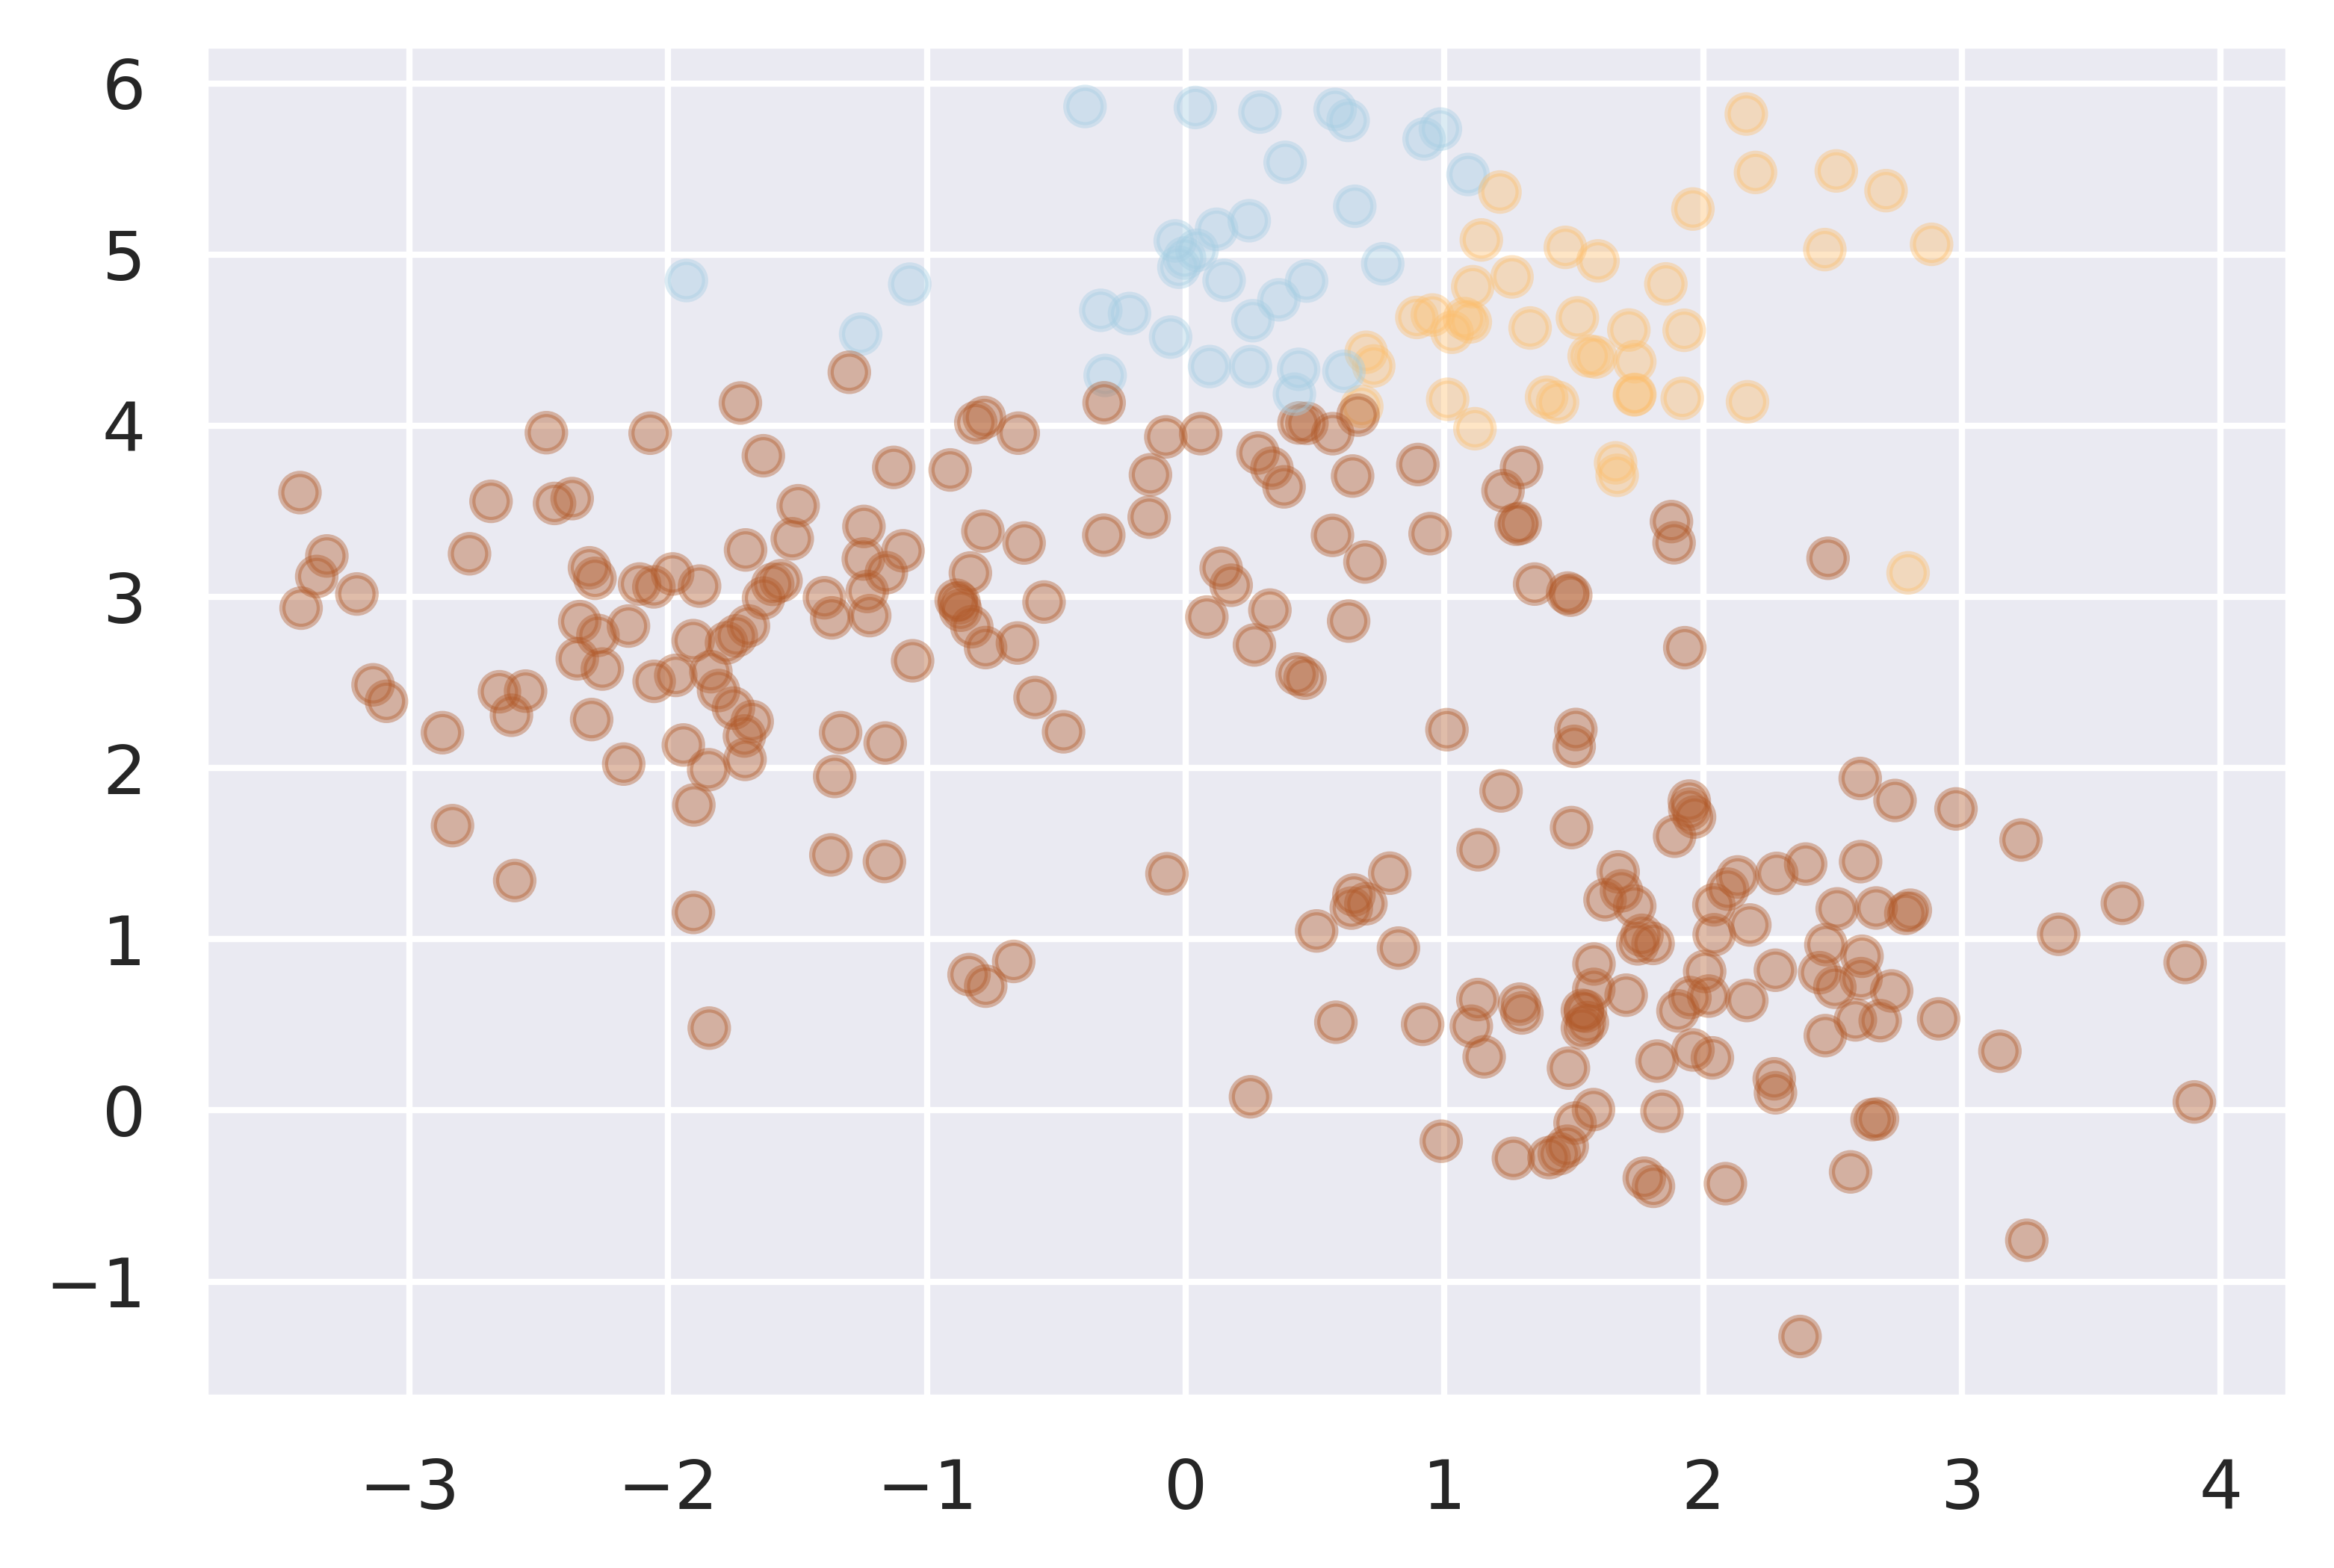

In [7]:
Y= y_km
a=plt.scatter(X[:,0], X[:,1], c=y_km, cmap=plt.cm.Paired, alpha=0.4)
left, right = plt.xlim()
up, down = plt.ylim()
print(up, down, left, right)

In [21]:
from sklearn.linear_model import LogisticRegression

from ipywidgets import *
def func(f):
    fig, ax = plt.subplots()

    logreg = LogisticRegression(C=1e5, max_iter=f)

    # Create an instance of Logistic Regression Classifier and fit the data.
    logreg.fit(X, Y)

    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    h = .01  # step size in the mesh
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = logreg.predict(np.c_[xx.ravel(), yy.ravel()])
    
    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired, alpha=1)
    #plt.contour(xx,yy,Z, linewidths=0.3,linestyles="solid", colors= "black")
    # Plot also the training points
    rect = plt.Rectangle((-10, -10), 20, 20, facecolor="white", alpha=0.6)
    ax.add_patch(rect)
    ax.scatter(X[:, 0], X[:, 1], c=Y,  alpha=1,edgecolors='k', cmap=plt.cm.Paired, zorder=10)
    plt.xlim(left, right)
    plt.ylim(up, down);
    name=  f"img_sk/C{f:03}"
    plt.savefig(name)
    print("yes")
    
interact(func,f=IntSlider(min=1, max=23, step=1,continuous_update=False)); 

interactive(children=(IntSlider(value=1, continuous_update=False, description='f', max=23, min=1), Output()), …

In [41]:
from sklearn.linear_model import LogisticRegression
from pylab import *

from ipywidgets import *
def func(f):
    fig, ax = plt.subplots()

    logreg = LogisticRegression(C=1e5, max_iter=f)

    # Create an instance of Logistic Regression Classifier and fit the data.
    logreg.fit(X, Y)

    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    h = .01  # step size in the mesh
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = logreg.predict(np.c_[xx.ravel(), yy.ravel()])
    
    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired, alpha=1)
    #plt.contour(xx,yy,Z, linewidths=0.3,linestyles="solid", colors= "black")
    # Plot also the training points
    rect = plt.Rectangle((-10, -10), 20, 20, facecolor="white", alpha=0.6)
    ax.add_patch(rect)
    ax.scatter(X[:, 0], X[:, 1], c=Y,  alpha=1,edgecolors='k', cmap=plt.cm.Paired, zorder=10)
    cmap = cm.get_cmap('Paired', 3) 
    ax.scatter(3, 5, marker='8', c="w", edgecolors='k' ,  alpha= 1, s= 200, zorder=10  )
    plt.xlim(left, right)
    plt.ylim(up, down);
    name=  f"img_sk/D05"
    plt.savefig(name)
    print("yes")
    
interact(func,f=FloatSlider(min=15, max=23, step=1,continuous_update=False)); 

interactive(children=(FloatSlider(value=15.0, continuous_update=False, description='f', max=23.0, min=15.0, st…

In [20]:
from pylab import *

cmap = cm.get_cmap('seismic', 5)    # PiYG

for i in range(cmap.N):
    rgb = cmap(i)[:3] # will return rgba, we take only first 3 so we get rgb
    print(matplotlib.colors.rgb2hex(rgb))

#00004c
#0000ff
#ffffff
#ff0000
#800000
